In [1]:
from pathlib import Path
import sys
PROJECT_ROOT = Path.cwd().parent
SRC = PROJECT_ROOT / "src"
if str(SRC) not in sys.path:
    sys.path.insert(0, str(SRC))
print("Using SRC:", SRC)


Using SRC: c:\Users\DELL I7\OneDrive\UVG\OCTAVO SEMESTRE\MODELACION Y SIMULACION\PROYECTO_FINAL\muscle_adaptation_project_v3\BORRADORProyectoModSim\src


# 03 — Métricas, sensibilidad y análisis complementario

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parents[1] / "src"))

from sd_model.params import Params
from sd_model.experiments import base_run, deload_toggle_run, metrics, sweep_beta_phi


## 1) Deload ON vs OFF

Métricas (Deload ON): {'t_peak_R': 180.0, 'peak_R': 0.9999997626152136, 't_peak_M': 29.75, 'peak_M': 1.0507059551622973, 'deltaM_final': 0.0033014510536120145, 'AUC_I': 3.7031914101224905}
Métricas (Deload OFF): {'t_peak_R': 180.0, 'peak_R': 0.9999996560550477, 't_peak_M': 29.75, 'peak_M': 1.0507059551622973, 'deltaM_final': 0.0033021393361603035, 'AUC_I': 3.7037218422727123}


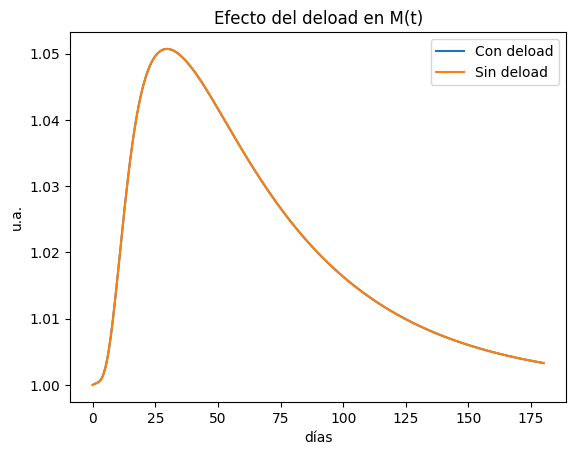

In [3]:

p = Params()
on = deload_toggle_run(True, p)
off = deload_toggle_run(False, p)

m_on = metrics(on, M0=p.M0)
m_off = metrics(off, M0=p.M0)

print("Métricas (Deload ON):", m_on)
print("Métricas (Deload OFF):", m_off)

plt.figure()
plt.plot(on["t"], on["M"], label="Con deload")
plt.plot(off["t"], off["M"], label="Sin deload")
plt.title("Efecto del deload en M(t)")
plt.xlabel("días"); plt.ylabel("u.a."); plt.legend(); plt.show()


## 2) Sensibilidad — barrido en β (sensibilidad al estímulo) y φ (recaída)

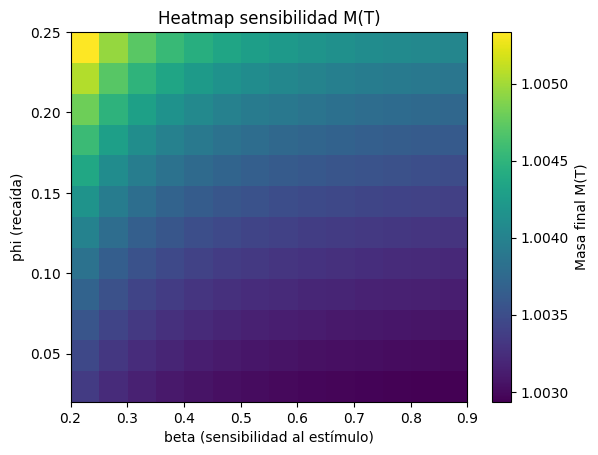

In [4]:

beta_vals = np.linspace(0.2, 0.9, 14)
phi_vals = np.linspace(0.02, 0.25, 12)
grid = sweep_beta_phi(beta_vals, phi_vals, Params())

plt.figure()
im = plt.imshow(grid.T, origin="lower", aspect="auto",
                extent=[beta_vals[0], beta_vals[-1], phi_vals[0], phi_vals[-1]])
plt.colorbar(im, label="Masa final M(T)")
plt.xlabel("beta (sensibilidad al estímulo)")
plt.ylabel("phi (recaída)")
plt.title("Heatmap sensibilidad M(T)"); plt.show()


## 3) Espacio de estados — trayectoria (I vs R)

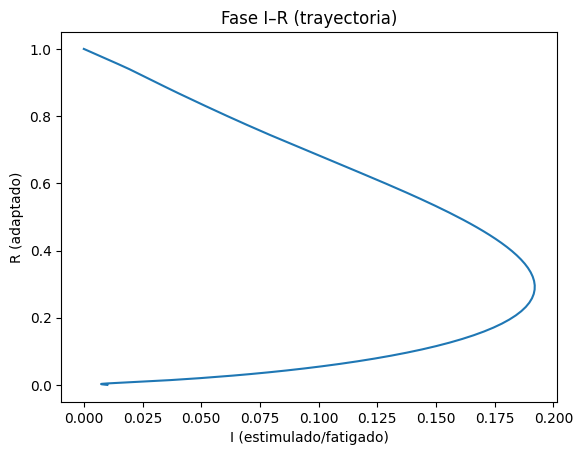

In [5]:

base = base_run(Params())
I, R = base["I"], base["R"]

plt.figure()
plt.plot(I, R)
plt.xlabel("I (estimulado/fatigado)")
plt.ylabel("R (adaptado)")
plt.title("Fase I–R (trayectoria)")
plt.show()



**Notas**  
- Deload desplaza el pico de adaptación y mejora la masa final cuando φ es significativo.  
- El heatmap muestra la frontera práctica entre ganancias sostenibles (β alto, φ bajo) vs. estancamiento (β bajo, φ alto).  
- La curva I–R ayuda a discutir estabilidad y régimen estacionario en el espacio de estados.
